In [41]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [36]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) # add channel dimension
x_test = x_test / 255.0 # normalization

y_train = tf.keras.utils.to_categorical(y_train, 10) # one-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10) # number of classes is 10 in fashion_mnist

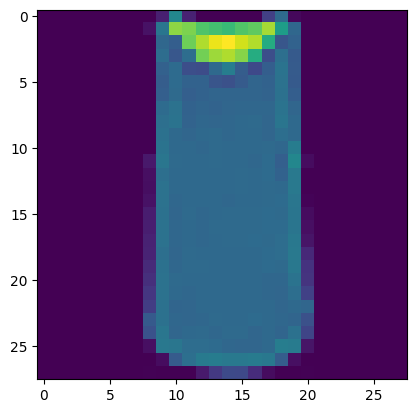

In [37]:
plt.imshow(x_train[2])

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4567 - accuracy: 0.8383
Epoch 2/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3100 - accuracy: 0.8904
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2679 - accuracy: 0.9045
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2418 - accuracy: 0.9128
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2229 - accuracy: 0.9201


In [42]:
model.save('fashion_mnist.savedmodel')

INFO:tensorflow:Assets written to: fashion_mnist.savedmodel\assets


INFO:tensorflow:Assets written to: fashion_mnist.savedmodel\assets


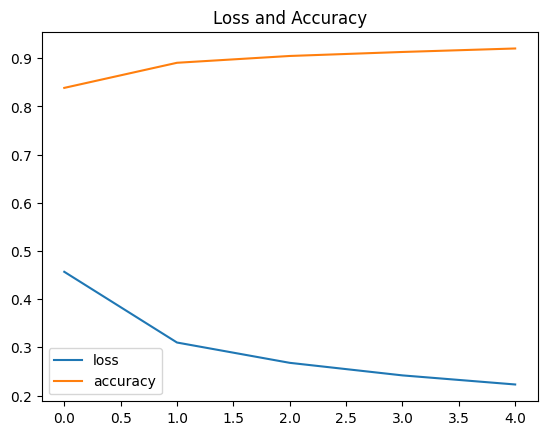

In [43]:
pd.DataFrame(history.history).plot()
plt.title("Loss and Accuracy")
plt.show()

In [45]:
results = model.evaluate(x_test, y_test)
print("Model accuracy on test data: ", results[1] * 100, "%")

313/313 [==============================] - 2s 5ms/step - loss: 0.2582 - accuracy: 0.9071
Model accuracy on test data:  90.71000218391418 %


In [62]:
predictions = model.predict(x_test)
print("Prediction Probabilities of 1st sample: ", predictions[0])
predictions = tf.argmax(predictions, axis=1) # get the index of the highest probability
# Show model prediction and actual label
for i in range(len(predictions)):
    print("Model prediction: " + str(predictions[i]) + " Actual label: " + str(y_test[i]))

313/313 [==============================] - 2s 7ms/step
Prediction Probabilities of 1st sample:  [3.7976227e-07 1.3234479e-08 8.2547450e-07 9.2363015e-09 1.6693812e-07
 2.0731750e-03 1.0259216e-06 1.8053527e-03 5.0327511e-05 9.9606872e-01]
Model prediction: tf.Tensor(9, shape=(), dtype=int64) Actual label: tf.Tensor(9, shape=(), dtype=int64)
Model prediction: tf.Tensor(2, shape=(), dtype=int64) Actual label: tf.Tensor(2, shape=(), dtype=int64)
Model prediction: tf.Tensor(1, shape=(), dtype=int64) Actual label: tf.Tensor(1, shape=(), dtype=int64)
Model prediction: tf.Tensor(1, shape=(), dtype=int64) Actual label: tf.Tensor(1, shape=(), dtype=int64)
Model prediction: tf.Tensor(6, shape=(), dtype=int64) Actual label: tf.Tensor(6, shape=(), dtype=int64)
Model prediction: tf.Tensor(1, shape=(), dtype=int64) Actual label: tf.Tensor(1, shape=(), dtype=int64)
Model prediction: tf.Tensor(4, shape=(), dtype=int64) Actual label: tf.Tensor(4, shape=(), dtype=int64)
Model prediction: tf.Tensor(6, sh